# Module 2: Data Analysis
## Sprint 1: Introduction to SQL & Statistics Fundamentals
### Part 5: Analysis of the Mental Health in the Tech Industry

<details><summary>About</summary>

## About this Part

Congrats!
You have reached the last Part of this Sprint.
As the final assignment of this Sprint, you will analyse the Mental Health in the Tech Industry Dataset.
You will have to apply all that you have learned about SQL, Statistics, and Data Analysis to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of exploration.
You'll have to iteratively raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now just use what you have learned and try your best!

## Objectives for this Part

- Practice working with SQLite datasets.
- Practice performing EDA.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Mental Health in the Tech Industry](https://www.kaggle.com/anth7310/mental-health-in-the-tech-industry).
- Load the data using SQLite and Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structure? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

## Correction

During your project correction, you should present your project as if talking to a product manager and senior data analyst working in your team.
You will have to find the right balance between explaining the business side and the technical aspects of your work.
You can assume that both of your colleagues have a strong understanding of and are very interested in the business aspect of your project, so be sure to clearly explain what new insights you've found while analyzing the dataset and which directions look the most promising for further research.
However, you should also spend time explaining the technical aspects of your work, especially the more complex or unconventional choices.

During a correction, you may get asked questions that test your understanding of covered topics.

- What are the main types and subtypes of data?
- What are the main metrics of location? What advantages and disadvantages each of them have?
- What is variability? What are the main metrics of variability? What advantages and disadvantages each of them have?
- What is correlation? How do we use it to analyse data?
- What is a contingency table?

</details>

***

# The Analysis of Mental Health in the Tech Industry

Project by **Vilmantas Gėgžna**  

**Tools:** SQL, Python  
Helper tools: VSCode, Git  
**Skills:**  
-- statistical programming,   
-- data pre-processing,   
-- descriptive statistics and data visualization, EDA.  

**Abbreviations**

- IT -- information technologies
- MH -- mental health
- MHD -- mental health disorder 
- n -- sample/group size
- tech -- technology
- UK -- United Kingdom  
- USA, US -- United States of America  

**Contents:**

- Introduction
- Setup
- Overview of Data 
	- Investigation of Database Tables 
	- Investigation of Questionnaires 
- Exploratory Data Analysis 
	- Data Pre-Processing 
	- Activity of Respondents 
	- Respondent's Profile 
	- Productivity and Mental Health 
	- Factors Related to MHD Treatment Seeking 
- Take Away Points
- Suggestions to Improve the Analysis 

## Introduction

Various mental disorders is a **widely spread** phenomenon: approximately **1 in 5 adults** (21%, 52.9 million people) in the US experienced mental illness in 2020 [1] and up to 1 billion people across the globe suffer from various mental disorders.
**Loss in productivity** due to anxiety and depression — two most common conditions — alone **costs 1 trillion US dollars** annually worldwide [2]. 
Still, not enough attention is payed to mental health and not enough health care resources are assigned to improve the situation.
As one of the solutions in the US, Open Sourcing Mental Health a non-profit corporation was found in 2013.
The purpose it is to raise awareness, educate, and provide resources to support mental wellness in the tech and open source communities [3].
Since 2014, the corporation organizes surveys to investigate and understand status of mental health as well as attitudes towards mental health and frequency of mental health disorders in the tech industry.
This project is dedicated to the analysis of these surveys' data, acquired in 2014-2019. 


<div style="font-size:14px">

[1]: National Alliance of Mental Illness. URL: https://www.nami.org/mhstats (updated on June 2022)   
[2]: Mental health matters. The Lancet Global Health, 2020. URL: https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(20)30432-0/fulltext, DOI: https://doi.org/10.1016/S2214-109X(20)30432-0  
[3]: Open Sourcing Mental Health (OSMI) website. URL: https://osmihelp.org/about/about-osmi (visited on 2022-11-15)  

</div>


## Setup

In [1]:
# Packages and modules -------------------------------
# To connect SQL database
import sqlalchemy as sqa

# Data wrangling
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Missing value identification
import missingno as msno

# Custom functions
import functions as my

# Settings --------------------------------------------
# Default plot options
plt.rc("figure", titleweight="bold")
plt.rc("axes", labelweight="bold", titleweight="bold")
plt.rc("font", weight="normal", size=10)
plt.rc("figure", figsize=(7, 3))

# Pandas options
pd.set_option(
    "display.max_colwidth",
    None,
    "display.max_rows",
    1000,
    "display.max_columns",
    100,
)

# colors
green, blue, orange, red = "tab:green", "tab:blue", "tab:orange", "tab:red"

Functions, that are generalizable and may be used in several projects, are in separate file `functions.py`. *Ad hoc* functions specific for this dataset are defined in this document:

In [ ]:
# FIXME: create a `as_cat()` function from all `as_cat__*()` functions.

In [2]:
# -- Custom ad-hoc functions
# Convert to categorical
def as_cat__yes_maybe_no(x):
    """Convert to categorical variable with levels "Yes", "Maybe", "No"

    Args:
        x (pandas.Series): Original variable

    Returns:
        pandas.Series: Variable with new data type
    """
    return pd.Categorical(x, categories=["Yes", "Maybe", "No"])


def as_cat__yes_no(x):
    """Essentially the same function as as above (with other categories)"""
    return pd.Categorical(x, categories=["Yes", "No"])


def as_cat__yes_no_dk(x):
    """Essentially the same function as as above (with other categories)"""
    return pd.Categorical(x, categories=["Yes", "No", "Don't know"])


def as_cat__yes_no_ne_dk(x):
    """Essentially the same function as as above (with other categories)"""
    return pd.Categorical(
        x, categories=["Yes", "No", "Not eligible for coverage", "Don't know"]
    )

def as_cat__yes_maybe_no(x):
    """Convert to categorical variable with levels "Yes", "Maybe", "No"

    Args:
        x (pandas.Series): Original variable

    Returns:
        pandas.Series: Variable with new data type
    """
    return pd.Categorical(x, categories=["Yes", "Maybe", "No"])


def as_cat__yes_no(x):
    """Essentially the same function as as above (with other categories)"""
    return pd.Categorical(x, categories=["Yes", "No"])


def as_cat__yes_no_dk(x):
    """Essentially the same function as as above (with other categories)"""
    return pd.Categorical(x, categories=["Yes", "No", "Don't know"])

        
    "yes_no_ne_dk"    categories=["Yes", "No", "Not eligible for coverage", "Don't know"]


# Get question text from 'Question' table by ID
def print_questions(id):
    """Show question text by id

    Args:
        id (integer or tuple of integers): Question IDs in 'Question' table.
    """
    if type(id) in [int, float]:
        id = f"({int(id)})"
        s = ""
    else:
        s = "s"

    questions = pd.read_sql(
        f"""--sql
        SELECT questionid ID, questiontext 'Question'
        FROM Question 
        WHERE QuestionID IN {id};
        """,
        db_engine,
    )
    print(f"Question{s}:")
    display(questions)

## Overview of Data

In this project, "[Mental Health in the Tech Industry](https://www.kaggle.com/anth7310/mental-health-in-the-tech-industry)" database from Kaggle, which covers surveys conducted in 2014-2019, was used.
The database consists of 3 tables: 'Answer', 'Question', 'Survey':

- Table '`Survey`' contains the names of surveys, which where performed in different years.
The column with survey ID indicates the year of investigation.
The data spans from 2014 to 2019 (excluding year 2015).

- Table '`Question`' contains unique 105 questions used in all the surveys.
  Question IDs range from 1 to 118 and IDs between 35 and 47 are missing.
  Twelve questions are common for all surveys, some are used just in a single survey, but most are common for a subset of surveys.

- Table '`Answer`' contains the answers to the questions of each survey in a long-format table (one row per combination of year, question, and respondent).
Survey ID ranges from 2014 to 2019 with 5 unique values, user ID from 1 to 4218 with 4218 unique responses (filled survey questionnaires)**¹**, question ID from 1 to 118 with 105 unique values, so these numbers mach data from the other tables.

    In the answer text field of this table, there are some strange values, e.g., "`¯\(°_o)/¯`", that might need further investigation, if those questions are included in the analysis.

    There are no NaN/Null values:

    - Due to table form (long format), structural missing values are not present. It would be a case if there were one record per user or per user and survey combination.
    - Unanswered/Skipped questions are either not included or missing values are coded in a different way (e.g., as `-1`: we will see this in another section). 

<div style="font-size:14px">

**¹** We will make an assumption that a single respondent participated in a single survey only once and, to avoid confusion, instead of term "response to the survey" we will use term "respondent".

</div>

Find the details in the subsections below.

### Investigation of Database Tables

In [3]:
# Create a connection to the database.
db_engine = sqa.create_engine("sqlite:///data/mental_health.sqlite")

In [4]:
# List tables
sqa.inspect(db_engine).get_table_names()

['Answer', 'Question', 'Survey']

Let's look to each table separately.

- Table '`Survey`' is small and self explanatory:

In [5]:
pd.read_sql("SELECT COUNT(*) n_rows FROM Survey;", db_engine)

,n_rows
0,5


In [6]:
ds_survey = pd.read_sql("SELECT * FROM Survey;", db_engine)
ds_survey

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


- Table '`Question`' contains text of all questions:

In [7]:
ds_questions = pd.read_sql("SELECT * FROM Question;", db_engine)
ds_questions.head()

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5


In [8]:
pd.read_sql(
    """--sql
    SELECT 
        COUNT(*) n_rows,
        COUNT(DISTINCT questiontext) n_questions,
        MIN(questionid) question_id_min,
        MAX(questionid) question_id_max
    FROM Question;
""",
    db_engine,
)

,n_rows,n_questions,question_id_min,question_id_max
0,105,105,1,118


In [9]:
ds_questions.isnull().sum()

questiontext    0
questionid      0
dtype: int64

In [10]:
# Missing IDs
set(range(1, ds_questions.questionid.max() + 1)) - set(ds_questions.questionid)

{35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47}

* Table '`Answer`' is the biggest one:

In [11]:
pd.read_sql(
    """--sql
    SELECT COUNT(*) n_rows__in_answers_tbl FROM Answer;
    """,
    db_engine,
)

,n_rows__in_answers_tbl
0,236898


In [12]:
ds_answer = pd.read_sql("SELECT * FROM Answer;", db_engine)
ds_answer.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [13]:
ds_answer.isnull().sum()

AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64

In [14]:
ds_answer.agg(["min", "max", "nunique"])

,AnswerText,SurveyID,UserID,QuestionID
min,\n,2014,1,1
max,¯\(°_o)/¯,2019,4218,118
nunique,4215,5,4218,105


***

### Investigation of Questionnaires

In this subsection we will try to answer to the following questions:
- **Are the number of questions in each survey the same?**
- **Are there any questions common for all surveys? Which ones?**

Bottom rows of reshaped dataset:

year       2014  2016 2017 2018 2019
QuestionID                          
114         NaN  True  NaN  NaN  NaN
115         NaN  True  NaN  NaN  NaN
116         NaN  True  NaN  NaN  NaN
117         NaN  True  NaN  NaN  NaN
118         NaN  True  NaN  NaN  NaN


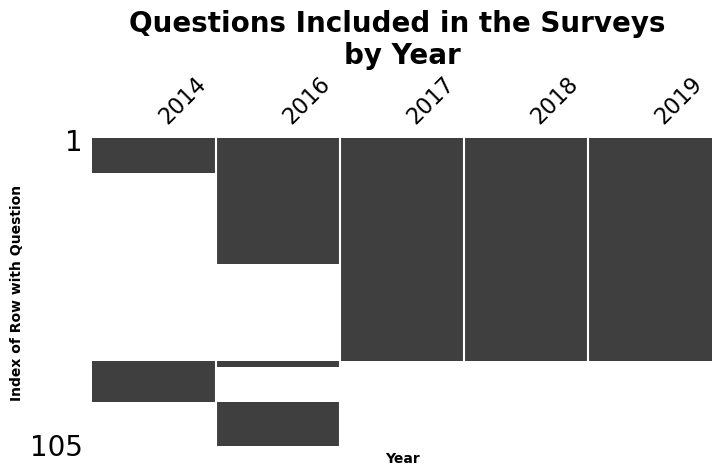

In [15]:
incl_questions = pd.read_sql(
    """--sql
    SELECT DISTINCT SurveyID year, QuestionID, 'True' response 
    FROM Answer;
    """,
    db_engine,
)

incl_questions_by_year = incl_questions.pivot_table(
    index="QuestionID",
    columns="year",
    values="response",
    aggfunc="first",
)

# Preview reshaped dataset
print("Bottom rows of reshaped dataset:\n")
print(incl_questions_by_year.tail())

# Plot missing values
ax = msno.matrix(incl_questions_by_year, sparkline=False, figsize=(8, 4))
ax.set_xlabel("Year")
ax.set_ylabel("Index of Row with Question")
ax.set_title("Questions Included in the Surveys \nby Year", fontsize=20);

Each row represents a unique question: if in the plot, the row is represented by dark square then the question is included while rectangles represent question that are not present in particular survey.

It seems that 2017, 2018, and 2019 year surveys use the same questionnaires and around a half of the questions of these surveys overlap with questions with 2016 year survey.

There are 12 questions common for all surveys, and there 31 more questions that are common for 2016-2019 year surveys.



In [16]:
# -- IDs of questions common for all the surveys
def get_all_true_rows(data):
    is_all_true = (~data.isnull()).all(axis=1)
    return [i for i in data[is_all_true].index]


common_question_id = get_all_true_rows(incl_questions_by_year)
print(f"N common questions for all the surveys: {len(common_question_id)}")
print("IDs of these questions:")
common_question_id

N common questions for all the surveys: 12
IDs of these questions:


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

Additionally, questions that are common for 2016-2019 surveys (excluding the questions listed above):

In [17]:
# -- IDs of questions common just for 2016-2019 surveys

common_question_id_2 = get_all_true_rows(
    incl_questions_by_year.drop(2014, axis=1)
)
q_id = list(set(common_question_id_2) - set(common_question_id))

print(f"N common questions just for 2016-2019 surveys: {len(q_id)}")
print("IDs of these questions:")
print(q_id[:20])
print(q_id[20:])

N common questions just for 2016-2019 surveys: 31
IDs of these questions:
[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[33, 34, 48, 49, 50, 51, 52, 53, 54, 55, 56]


If needed, you can find these questions listed in Supplement B  
(file `supplement-b--commn-questions.ipynb`)

***

## Exploratory Data Analysis

Due to large number of questions, it was decided to concentrate mainly on the subset of questions which are common either to all surveys or to all surveys except from the first one (year 2014). More concretely, these topics will be the focus of this analysis:

1) Activity of respondents to participate in each survey.
2) Profile of typical respondent, who participated in the survey.
3) Mental health and productivity.
4) Factors related to MHD treatment seeking.

Before delving into analysis, data must get prepared. So let's begin with pre-processing.



> **NOTE:** In my opinion, sections "Mental Health and Productivity" and "Factors Related to MHD Treatment Seeking" are the most important, so spend enough time exploring these.
>

### Data Pre-Processing

Most of data pre-processing steps are presented in this section.
But some are in the other subsections of data analysis if this looked more convenient.

A frequent pre-processing steps:

- `-1` represents missing value so it is recoded into one.
- in "Yes/No" questions, `0` recoded into `No`, and `1` into `Yes`.

**Age.**
In the dataset, there are negative as well as extremely large (>300) age values.
It was decided, to include values between 18 and 80 years old:

In [18]:
# Age: all_values
v_age = pd.read_sql(
    """--sql
    SELECT UserID user_id, CAST(AnswerText AS INT) AS age
    FROM Answer 
    WHERE QuestionID = 1;
    """,
    db_engine,
)

v_age.drop("user_id", axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
age,4218.0,33.915363,10.478054,-29.0,28.0,33.0,38.0,329.0


In [19]:
# -- Extreme values of age
print("Extreme values:")
pd.read_sql(
    """--sql
    WITH q1_int AS (
        SELECT CAST(AnswerText AS INT) age_value
        FROM Answer
        WHERE QuestionID = 1
    )
    
    SELECT age_value, COUNT(age_value) count
    FROM q1_int 
    WHERE age_value NOT BETWEEN 20 AND 65
    GROUP BY age_value
    ORDER BY age_value;
    """,
    db_engine,
).T

Extreme values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
age_value,-29,-1,0,3,5,8,11,15,17,18,19,66,67,70,72,74,99,323,329
count,1,5,1,1,1,1,1,1,1,9,20,2,2,1,1,1,1,1,1


[Text(0.5, 1.0, 'Age Distribution (Raw Data)')]

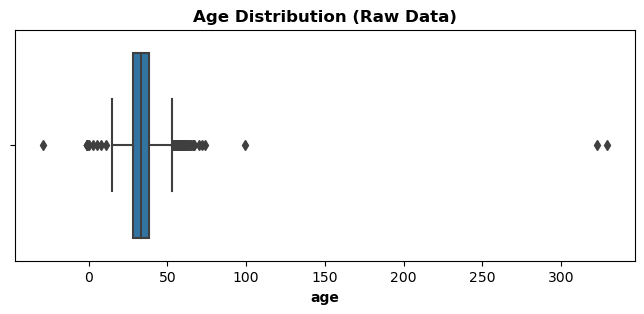

In [20]:
plt.figure(figsize=(8, 3))
sns.boxplot(x="age", data=v_age).set(title="Age Distribution (Raw Data)")

In [21]:
# -- Filter out age of interest (18-80 y.o.)
q_age = pd.read_sql(
    """--sql
    WITH q1_int AS (
        SELECT UserID user_id, CAST(AnswerText AS INT) age
        FROM Answer 
        WHERE QuestionID = 1
    )
    SELECT
        user_id, 
        -- Age
        CASE 
            WHEN age BETWEEN 18 and 80 THEN age
            ELSE NULL
        END AS age,
        -- Age group: every ~5 year
        CASE
            WHEN age >= 18 AND age < 26 THEN "18-25"
            WHEN age >= 26 AND age < 31 THEN "26-30"
            WHEN age >= 31 AND age < 36 THEN "31-35"
            WHEN age >= 36 AND age < 41 THEN "36-40"
            WHEN age >= 41 AND age < 46 THEN "41-45"
            WHEN age >= 46 AND age < 51 THEN "46-50"
            WHEN age >= 51 AND age < 56 THEN "51-55"
            WHEN age >= 56 AND age < 61 THEN "56-60"
            WHEN age >= 61 AND age < 66 THEN "61-65"
            WHEN age >= 66 AND age < 71 THEN "66-70"
            WHEN age >= 71 AND age < 76 THEN "71-75"
            ELSE NULL
        END AS age_group,
        -- Age group: 3 categories,
        CASE
            WHEN age >= 18 AND age < 36 THEN "18-35"
            WHEN age >= 36 AND age < 76 THEN "36-75"
            ELSE NULL
        END AS age_group_2
    FROM q1_int
    """,
    db_engine,
)

**Gender.** 
In the dataset, there were many various values to describe gender. For pre-processing, all values were lowercased, them words "female" and "femmina" were treated as "female", words "male", "cishet male", "masculine", and "masculino" as "male". All remaining were assigned to category "Other/Unknown".

In [22]:
# Gender
q_gender = pd.read_sql(
    """--sql
    WITH gender_lower AS (
        SELECT UserID user_id, LOWER(AnswerText) gender_answer, SurveyID year
        FROM Answer
        WHERE QuestionID = 2
    )
        
    SELECT 
        user_id,
        year,
        -- Pre-process gender values. 
        -- If needed, use original values from "gender_answer" for checking
        (CASE 
            -- female options
            WHEN gender_answer LIKE "female"  OR
                 gender_answer LIKE "femmina"    
            THEN "Female"
            -- male options
            WHEN gender_answer LIKE "male"        OR
                 gender_answer LIKE "masculine"   OR
                 gender_answer LIKE "masculino"   OR
                 gender_answer LIKE "cishet male" 
            THEN "Male"
            -- other
            ELSE "Other/Unknown"
        END) AS gender
    FROM gender_lower;
""",
    db_engine,
)

**Country of residence and region.** 
Country names were recoded in the following way:

- 'United States' and 'United States of America' were merged into 'USA'
- 'United Kingdom' shortened to 'UK'
- Values `-1` were treated as missing values.

Additional variables were created too:

- `country_major_ctb` (countries that are major contributors to survey), in this variable, least frequently occurring countries were merged into "Other"
- `region`, were countries were classified into regions like North America, Asia or Europe.

In [23]:
# -- Country of residence
q_country_live = pd.read_sql(
    """--sql
    -- Use unified or shorter country names
    WITH countries_recoded AS (
        SELECT 
            UserID user_id,
            CASE 
                WHEN AnswerText IN ('United States', 'United States of America') 
                THEN 'USA'
                WHEN AnswerText IN ('United Kingdom')
                THEN 'UK'
                WHEN AnswerText IN (-1 , 'Unknown') OR AnswerText IS NULL
                THEN NULL
                ELSE AnswerText
            END AS country
        FROM answer
        WHERE QuestionID = 3
    ),
    -- Filter out countries itch contributed least
    major_contributor AS (
        SELECT country, COUNT(country) count
        FROM countries_recoded
        GROUP BY country
        HAVING COUNT(country) >= 50
        ORDER BY count DESC
    )
    
    SELECT
        user_id,
        country,
        -- Only most contributing countries
        CASE 
            WHEN country IN (SELECT country from major_contributor) THEN country
            WHEN country IN (-1, 'Unknown') OR country IS NULL THEN NULL
            ELSE 'Other'
        END AS country_major_ctb,
        -- Region
        CASE
            WHEN country IN (
                 "Algeria", "Ethiopia", "Ghana", "Nigeria", "Kenya",
                 "South Africa", "Mauritius", "Zimbabwe") 
            THEN 'Africa'

            WHEN country IN ("Australia", "New Zealand") 
            THEN 'Australasia'
 
            WHEN country IN (
                "China", "Georgia", "India", "Israel", "Japan", 
                "Philippines", "Singapore", "Thailand", "Pakistan",
                "Turkey", "Iran", "Afghanistan", "Indonesia", 
                "Bangladesh", "Hong Kong", "Saudi Arabia", "Jordan",
                "Brunei", "Taiwan", "Vietnam") 
            THEN 'Asia'
            
            WHEN country IN (
                "Austria", "Belgium", "Bosnia and Herzegovina", "Bulgaria", 
                "Croatia",  "Czech Republic", "Denmark", "Finland", "France",
                "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia",
                "Lithuania", "Moldova", "Serbia", "Ukraine", "Belarus", 
                "Netherlands", "Slovakia", "Estonia", "Iceland", "Macedonia",
                "Norway", "Poland", "Portugal", "Romania", "Slovenia", 
                "Spain", "Sweden", "Switzerland", "UK", --Europe
                "Russia")  -- Both Asia and Europe
            THEN 'Europe'

            WHEN country IN ("USA", "Canada", "Bahamas, The") 
            THEN 'North America'
            
            WHEN country IN (
                "Mexico", "Brazil", "Costa Rica", "Colombia", "Uruguay", 
                "Guatemala", "Ecuador", "Argentina", "Chile", "Venezuela")
            THEN 'Latin America'
            
            WHEN country IN  ('Other', 'Unknown')
            THEN NULL
            
            ELSE country
        END AS region
        
    FROM countries_recoded;
    """,
    db_engine,
)

**Other variables** of interest were also prepared for analysis. 
In some cases similar values were merged into a single category.
But usually values were recoded into human-readable form (like "Yes", "No", etc.) and converted to categorical variables to keep order of categories constant. 
Some values were pre-pended with letters (A, B, etc.) to be sorted in alphabetical order.

In [24]:
# -- Mental heath
q_have_mhd = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        CASE 
            -- "Maybe", "Possibly", "Don't Know" looks like the same state
            -- of uncertainty about diagnosis
            WHEN AnswerText IN ("Maybe", "Possibly", "Don't Know")
            THEN "Don't know"
            WHEN AnswerText = -1 
            THEN NULL
            ELSE AnswerText
        END AS have_mhd
    FROM Answer 
    WHERE QuestionID = 33;
    """,
    db_engine,
)
q_have_mhd.have_mhd = as_cat__yes_no_dk(q_have_mhd.have_mhd)

q_ever_diagnosed_mhd = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        CASE 
            WHEN AnswerText = -1 THEN NULL
            ELSE AnswerText
        END AS ever_diagnosed_mhd
    FROM Answer 
    WHERE QuestionID = 34;
    """,
    db_engine,
)
q_ever_diagnosed_mhd.ever_diagnosed_mhd = as_cat__yes_no(
    q_ever_diagnosed_mhd.ever_diagnosed_mhd
)

q_sought_professional_treatment = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        CASE 
            WHEN AnswerText = 0 THEN 'No'
            WHEN AnswerText = 1 THEN 'Yes'
            WHEN AnswerText = -1 THEN NULL
            ELSE AnswerText
        END AS ever_sought_prof_mhd_treatment
    FROM Answer 
    WHERE QuestionID = 7;
    """,
    db_engine,
)
q_sought_professional_treatment.ever_sought_prof_mhd_treatment = as_cat__yes_no(
    q_sought_professional_treatment.ever_sought_prof_mhd_treatment
)

In [25]:
# -- Company related
q_self_employed = pd.read_sql(
    """--sql
    SELECT
        UserID user_id,
        CASE 
            WHEN AnswerText = 0 THEN 'No'
            WHEN AnswerText = 1 THEN 'Yes'
            WHEN AnswerText = -1 THEN NULL
            ELSE AnswerText
        END AS self_employed
    FROM Answer 
    WHERE QuestionID = 5;
    """,
    db_engine,
)
q_self_employed.self_employed = as_cat__yes_no(q_self_employed.self_employed)

q_company_size = pd.read_sql(
    """--sql
    SELECT
        UserID user_id,
        -- Company size: 6 categories
        CASE
            WHEN AnswerText = '1-5' THEN 'A. 1-5'
            WHEN AnswerText = '6-25' THEN 'B. 6-25'
            WHEN AnswerText = '26-100' THEN 'C. 26-100'
            WHEN AnswerText = '100-500' THEN 'D. 100-500'
            WHEN AnswerText = '500-1000' THEN 'E. 500-1000'
            WHEN AnswerText = 'More than 1000' THEN 'F. More than 1000'
            WHEN AnswerText = -1 THEN NULL
            ELSE AnswerText
        END AS company_size,
        -- Company size: 3 categories
        CASE
            WHEN AnswerText IN ('1-5', '6-25', '26-100') THEN 'A. 1-100'
            WHEN AnswerText IN ('100-500', '500-1000') THEN 'B. 100-1000'
            WHEN AnswerText = 'More than 1000' THEN 'C. More than 1000'
            WHEN AnswerText = -1 THEN NULL
            ELSE AnswerText
        END AS company_size_3
    FROM Answer 
    WHERE QuestionID = 8;
    """,
    db_engine,
)

q_is_tech_org = pd.read_sql(
    """--sql
    SELECT
        UserID user_id,
        CASE 
            WHEN AnswerText = 0 THEN 'No'
            WHEN AnswerText = 1 THEN 'Yes'
            WHEN AnswerText = -1 THEN NULL
            ELSE AnswerText
        END AS is_tech_org
    FROM Answer 
    WHERE QuestionID = 9;
    """,
    db_engine,
)
q_is_tech_org.is_tech_org = as_cat__yes_no(q_is_tech_org.is_tech_org)

q_is_tech_it_role = pd.read_sql(
    """--sql
    SELECT
        UserID user_id,
        CASE 
            WHEN AnswerText = 0 THEN 'No'
            WHEN AnswerText = 1 THEN 'Yes'
            WHEN AnswerText = -1 THEN NULL
            ELSE AnswerText
        END AS is_tech_it_role
    FROM Answer 
    WHERE QuestionID = 13;
    """,
    db_engine,
)
q_is_tech_it_role.is_tech_it_role = as_cat__yes_no(
    q_is_tech_it_role.is_tech_it_role
)

In [26]:
# -- Company mental healthcare resources
q_employer_teach = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        CASE 
            WHEN AnswerText IN ("I don't know", "Don't know") THEN "Don't know"
            WHEN AnswerText = -1 THEN NULL
            ELSE AnswerText
        END AS employer_teach
    FROM Answer 
    WHERE QuestionID = 16;
    """,
    db_engine,
)
q_employer_teach.employer_teach = as_cat__yes_no_dk(
    q_employer_teach.employer_teach
)

q_employer_mental_healthcare = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        CASE 
            WHEN AnswerText IN ("I don't know", "Don't know")
            THEN "Don't know"
            WHEN AnswerText IN ("Not eligible for coverage / NA")
            THEN "Not eligible for coverage"
            WHEN AnswerText = -1
            THEN NULL
            ELSE AnswerText
        END AS employer_mental_healthcare
    FROM Answer 
    WHERE QuestionID = 10;
    """,
    db_engine,
)
q_employer_mental_healthcare.employer_mental_healthcare = as_cat__yes_no_ne_dk(
    q_employer_mental_healthcare.employer_mental_healthcare
)

q_anonym_protection_to_treat = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        CASE 
            WHEN AnswerText IN ("I don't know", "Don't know") THEN "Don't know"
            WHEN AnswerText = -1 THEN NULL
            ELSE AnswerText
        END AS anonym_protection_to_treat
    FROM Answer 
    WHERE QuestionID = 11;
    """,
    db_engine,
)
q_anonym_protection_to_treat.anonym_protection_to_treat = as_cat__yes_no_dk(
    q_anonym_protection_to_treat.anonym_protection_to_treat
)

In [27]:
# -- Atmosphere for openness
q_disclose_interview = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        CASE WHEN AnswerText = -1 THEN NULL 
             ELSE AnswerText
         END AS disclose_in_interview
    FROM Answer 
    WHERE QuestionID = 12;
    """,
    db_engine,
)
q_disclose_interview.disclose_in_interview = as_cat__yes_maybe_no(
    q_disclose_interview.disclose_in_interview
)


q_discus_with_coworkers = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        CASE WHEN AnswerText = -1 THEN NULL 
             ELSE AnswerText
        END AS discus_with_coworkers
    FROM Answer 
    WHERE QuestionID = 18;
    """,
    db_engine,
)
q_discus_with_coworkers.discus_with_coworkers = as_cat__yes_maybe_no(
    q_discus_with_coworkers.discus_with_coworkers
)

q_discus_with_supervisor = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        CASE WHEN AnswerText = -1 THEN NULL
             ELSE AnswerText
        END AS discus_with_supervisor
    FROM Answer 
    WHERE QuestionID = 19;
    """,
    db_engine,
)
q_discus_with_supervisor.discus_with_supervisor = as_cat__yes_maybe_no(
    q_discus_with_supervisor.discus_with_supervisor
)

# -- Atmosphere for openness: long DF
q_openness = pd.read_sql(
    """--sql
    SELECT
        UserID user_id, 
        'in interview' discuss_mental_issue,
        CASE WHEN AnswerText = -1 THEN NULL 
             ELSE AnswerText
         END AS choice
    FROM Answer 
    WHERE QuestionID = 12
    
    UNION ALL

    SELECT
        UserID user_id, 
        'with coworkers' discuss_mental_issue,
        CASE WHEN AnswerText = -1 THEN NULL 
             ELSE AnswerText
        END AS choice
    FROM Answer 
    WHERE QuestionID = 18
    
    UNION ALL
  
    SELECT
        UserID user_id,
        'with supervisor' discuss_mental_issue,
        CASE WHEN AnswerText = -1 THEN NULL
             ELSE AnswerText
        END AS choice
    FROM Answer 
    WHERE QuestionID = 19;
    """,
    db_engine,
)

q_openness.choice = as_cat__yes_maybe_no(q_openness.choice)

In [28]:
# -- Group 'Not applicable to me' was excluded
q_productivity = pd.read_sql(
    """--sql
    SELECT
        UserID user_id,
        CASE 
            WHEN AnswerText = 'Yes' THEN "Often"
            WHEN AnswerText = 'Unsure' THEN "Unsure"
            WHEN AnswerText = 'No' THEN "Rarely"
            WHEN AnswerText IN (-1, 'Not applicable to me') THEN NULL
            ELSE AnswerText
        END AS affected_productivity
    FROM Answer 
    WHERE QuestionID = 54;
    """,
    db_engine,
)

q_productivity.affected_productivity = pd.Categorical(
    q_productivity.affected_productivity,
    categories=["Often", "Unsure", "Rarely"],
)

Merge the variables of interest into a long-format data frame (one row per user ID):

In [29]:
ds = my.merge_all(
    [
        # -- Respondent profile
        q_gender,
        q_age,
        q_country_live,
        # -- Mental health status
        q_have_mhd,
        q_ever_diagnosed_mhd,
        q_sought_professional_treatment,
        # -- Company/Org./Role profile
        q_self_employed,
        q_company_size,
        q_is_tech_org,
        q_is_tech_it_role,
        # -- Mental health services at work
        q_employer_teach,
        q_employer_mental_healthcare,
        q_anonym_protection_to_treat,
        # -- Atmosphere for openness
        q_disclose_interview,
        q_discus_with_coworkers,
        q_discus_with_supervisor,
        # -- Productivity
        q_productivity,
    ]
)

In [30]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4217
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   user_id                         4218 non-null   int64   
 1   year                            4218 non-null   int64   
 2   gender                          4218 non-null   object  
 3   age                             4202 non-null   float64 
 4   age_group                       4202 non-null   object  
 5   age_group_2                     4202 non-null   object  
 6   country                         4216 non-null   object  
 7   country_major_ctb               4216 non-null   object  
 8   region                          4214 non-null   object  
 9   have_mhd                        2958 non-null   category
 10  ever_diagnosed_mhd              2095 non-null   category
 11  ever_sought_prof_mhd_treatment  4218 non-null   category
 12  self_employed       

***

### Activity of Respondents

In this subsection we will look into the **questionnaire sizes** used and **counts of respondents** participated in each survey.
 

As there is no information in database's description on duplicate responses, in this analysis we make an assumption that each response (i.e., a filled survey) equals to number of respondents.

In [31]:
# N question and respondents' activity
df_y_q = pd.read_sql(
    """--sql
    WITH by_year AS (
         SELECT 
            SurveyID year, 
            COUNT(DISTINCT QuestionID) n_questions,
            COUNT(DISTINCT UserID) n_respondents
        FROM Answer 
        GROUP BY year
    )
    
    SELECT year, 
          n_questions, 
          n_respondents, 
          -- To treat result as float, 0.0 was added:
          ROUND((n_respondents + 0.0)/n_questions, 1) respondents_per_question
    FROM by_year;
    """,
    db_engine,
)

,year,n_questions,n_respondents,respondents_per_question
0,2014,26,1260,48.5
1,2016,60,1433,23.9
2,2017,76,756,9.9
3,2018,76,417,5.5
4,2019,76,352,4.6


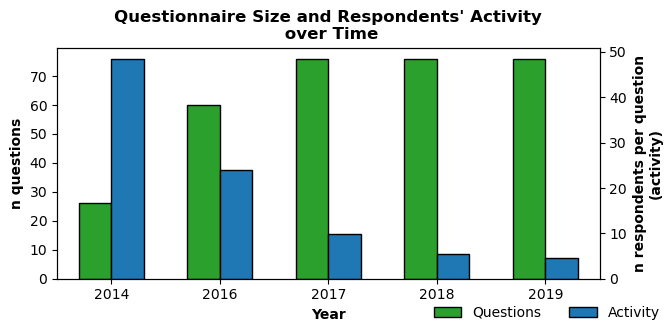

In [32]:
# Plot 1:
plt.rc("figure", figsize=(7, 3))
fig1, ax1 = plt.subplots()

ax = df_y_q.plot(
    x="year",
    y="n_questions",
    kind="bar",
    color=green,
    ec="black",
    position=1,
    rot=0,
    width=0.3,
    legend=False,
    xlabel="Year",
    ylabel="n questions",
    ax=ax1,
)

ax1b = ax.twinx()

df_y_q.plot(
    x="year",
    y="respondents_per_question",
    kind="bar",
    color=blue,
    ec="black",
    position=0,
    width=0.3,
    legend=False,
    xlabel="Year",
    ylabel="n respondents per question\n(activity)",
    ax=ax1b,
)

ax1b.set_xlim(-0.5, 5 - 0.5)
fig1.legend(["Questions", "Activity"], loc="lower right", ncol=2, frameon=False)
plt.title("Questionnaire Size and Respondents' Activity\n over Time")

# Table:
df_y_q

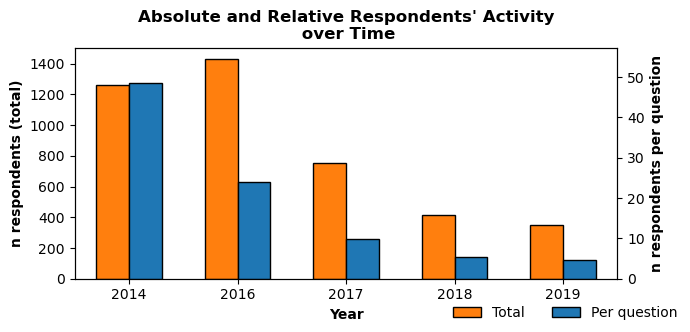

In [33]:
# Plot 2:
plt.rc("figure", figsize=(7, 3))
fig1, ax1 = plt.subplots()

ax = df_y_q.plot(
    x="year",
    y="n_respondents",
    kind="bar",
    color=orange,
    ec="black",
    position=1,
    rot=0,
    width=0.3,
    legend=False,
    xlabel="Year",
    ylabel="n respondents (total)",
    ax=ax1,
)

ax1b = ax.twinx()

df_y_q.plot(
    x="year",
    y="respondents_per_question",
    kind="bar",
    color=blue,
    ec="black",
    position=0,
    width=0.3,
    legend=False,
    xlabel="Year",
    ylabel="n respondents per question",
    ax=ax1b,
)
ax1b.set_ylim(0, 57.3)

ax1b.set_xlim(-0.5, 5 - 0.5)
fig1.legend(["Total", "Per question"], loc="lower right", ncol=2, frameon=False)
plt.title("Absolute and Relative Respondents' Activity\n over Time");

Over time questionnaire size increased, but respondents' activity decreased. The decreasing trend is visible for both absolute  and relative activity. Exception is in year 2016 for absolute number of respondents which increased.
This might be related to the fact that in year 2015 there was no poll or to other factors, which were not investigated (e.g., poll advertising strategies).

***

### Respondent's Profile

In the surveys, there were more male (72%) than female (24%) respondents. 
Mean age was around 34 (with standard deviation = 8) years old.
Dominant countries of residence were USA (62%) and UK (11%).
Dominant regions of residence were North America (67%) and Europe (26%).
In 2016 survey roughly half and in 2017-2019 surveys almost all (>90%) respondents were those, who had ever had MHD diagnosis, but at the time of surveys just around 40% identified themselves as currently having an MHD.
The respondents WERE either self employed or worked in various size companies.
The companies were mainly (78%) from the tech industry. 
And the respondents were mainly (94%) working as tech/IT specialists.

Find the details below:

,gender,n,percent
0,Female,1025,24.3%
1,Male,3046,72.2%
2,Other/Unknown,147,3.5%


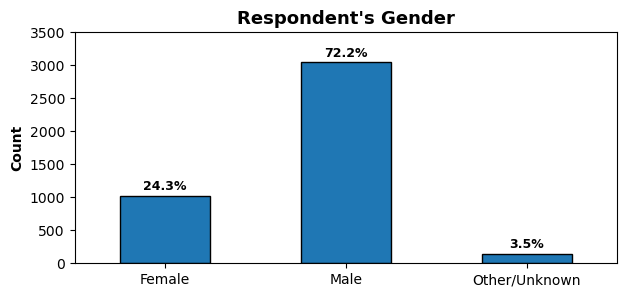

In [34]:
f_tbl = my.calc_counts_and_percentages("gender", ds, sort=False)
my.plot_counts_with_labels(
    f_tbl, x_lab="", y_lab="Count", rot=0, title="Respondent's Gender"
)
f_tbl

,count,mean,std,min,25%,50%,75%,max
age,4202.0,33.9,8.1,18.0,28.0,33.0,38.0,74.0


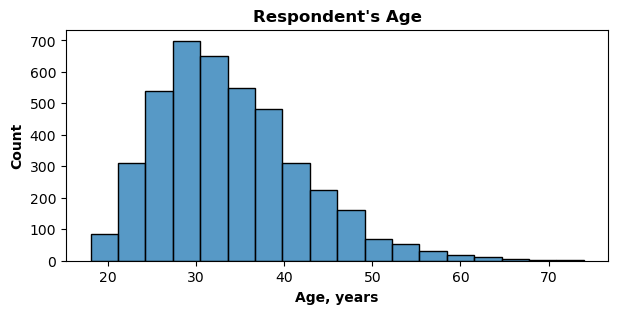

In [35]:
plt.figure(figsize=[7, 3])
(
    sns.histplot(data=ds, x="age", bins=18).set(
        title="Respondent's Age", xlabel="Age, years"
    )
)
pd.DataFrame(round(ds.age.describe(), 1)).T

,country_major_ctb,n,percent
0,USA,2604,61.8%
1,UK,482,11.4%
2,Other,472,11.2%
3,Canada,199,4.7%
4,Germany,136,3.2%
5,Netherlands,98,2.3%
6,Australia,73,1.7%
7,France,51,1.2%
8,Ireland,51,1.2%
9,India,50,1.2%


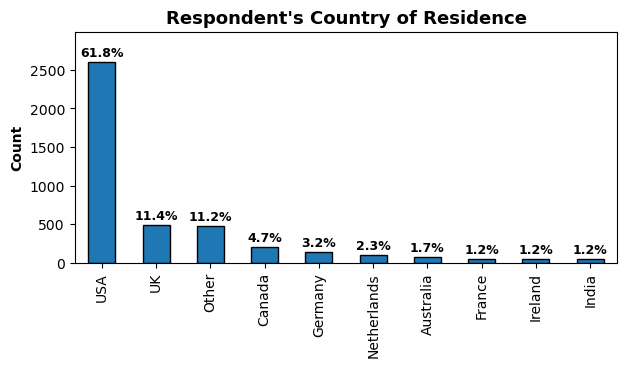

In [36]:
f_tbl = my.calc_counts_and_percentages("country_major_ctb", ds)
my.plot_counts_with_labels(
    f_tbl, x_lab="", y_lab="Count", title="Respondent's Country of Residence"
)
f_tbl

,region,n,percent
0,North America,2804,66.5%
1,Europe,1111,26.4%
2,Asia,108,2.6%
3,Australasia,97,2.3%
4,Latin America,69,1.6%
5,Africa,25,0.6%


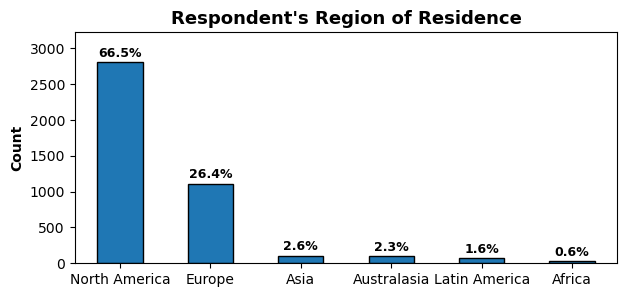

In [37]:
f_tbl = my.calc_counts_and_percentages("region", ds)
my.plot_counts_with_labels(
    f_tbl,
    x_lab="",
    y_lab="Count",
    rot=0,
    title="Respondent's Region of Residence",
)
f_tbl

Question:


,ID,Question
0,34,Have you ever been diagnosed with a mental health disorder?


ever_diagnosed_mhd,Yes,No
year,,
2016,716,717
2017,314,10
2018,189,2
2019,144,3


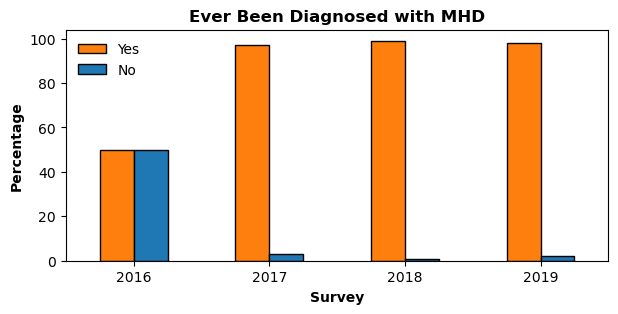

In [38]:
print_questions(34)

c_tab = my.crosstab(ds, "year", "ever_diagnosed_mhd")
my.plot_crosstab_as_barplot(
    c_tab,
    title="Ever Been Diagnosed with MHD",
    xlabel="Survey",
    color=[orange, blue],
)
plt.gca().legend(frameon=False)
c_tab

Question:


,ID,Question
0,33,Do you currently have a mental health disorder?


have_mhd,Yes,No,Don't know
year,,,
2016,575,531,327
2017,324,222,210
2018,191,112,114
2019,147,104,101


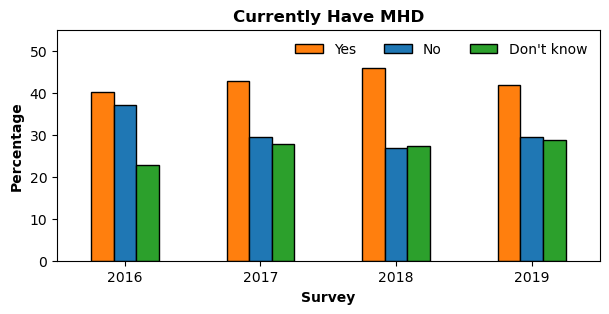

In [39]:
print_questions(33)

c_tab = my.crosstab(ds, "year", "have_mhd")
my.plot_crosstab_as_barplot(
    c_tab,
    ylim=[None, 55],
    xlabel="Survey",
    title="Currently Have MHD",
    color=[orange, blue, green],
)
plt.gca().legend(frameon=False, ncol=3)
c_tab

,self_employed,n,percent
0,Yes,650,15.5%
1,No,3550,84.5%


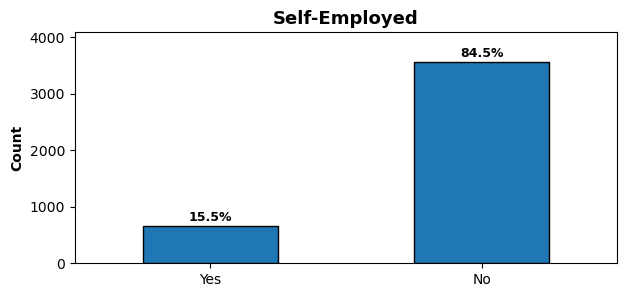

In [40]:
f_tbl = my.calc_counts_and_percentages("self_employed", ds, sort=False)
my.plot_counts_with_labels(f_tbl, x_lab="", rot=0, title="Self-Employed")
f_tbl

,company_size,n,percent
0,A. 1-5,254,6.8%
1,B. 6-25,689,18.6%
2,C. 26-100,824,22.2%
3,D. 100-500,788,21.2%
4,E. 500-1000,247,6.7%
5,F. More than 1000,912,24.6%


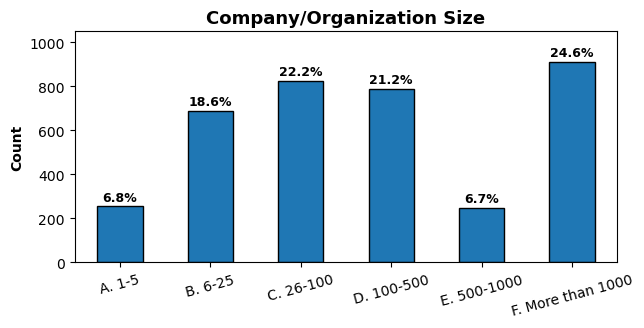

In [41]:
f_tbl = my.calc_counts_and_percentages("company_size", ds, sort="index")
my.plot_counts_with_labels(
    f_tbl, x_lab="", rot=15, title="Company/Organization Size"
)
f_tbl

,is_tech_org,n,percent
0,Yes,2888,77.8%
1,No,826,22.2%


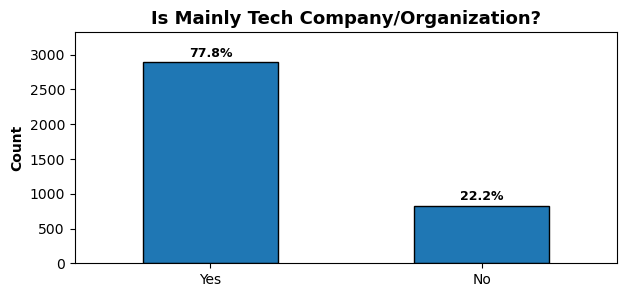

In [42]:
f_tbl = my.calc_counts_and_percentages("is_tech_org", ds, sort="index")
my.plot_counts_with_labels(
    f_tbl, x_lab="", rot=0, title="Is Mainly Tech Company/Organization?"
)
f_tbl

,is_tech_it_role,n,percent
0,Yes,1471,93.6%
1,No,100,6.4%


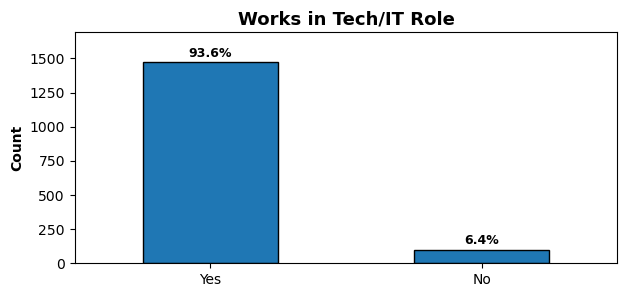

In [43]:
f_tbl = my.calc_counts_and_percentages("is_tech_it_role", ds)
my.plot_counts_with_labels(
    f_tbl, x_lab="", rot=0, title="Works in Tech/IT Role"
)
f_tbl

***

### Mental Health and Productivity

Approximately 81% of respondents (out of 453) think that their mental illness affects their productivity **often**.
Furthermore, basing on the answers of 2031 respondents, productivity is **less interfered if** metal health issues  are **treated** effectively.

This information was revealed by analyzing the answers to the following 3 questions:

In [44]:
print_questions(54)

Question:


,ID,Question
0,54,Do you believe your productivity is ever affected by a mental health issue?


,affected_productivity,n,percent
0,Often,367,81.0%
1,Unsure,60,13.2%
2,Rarely,26,5.7%


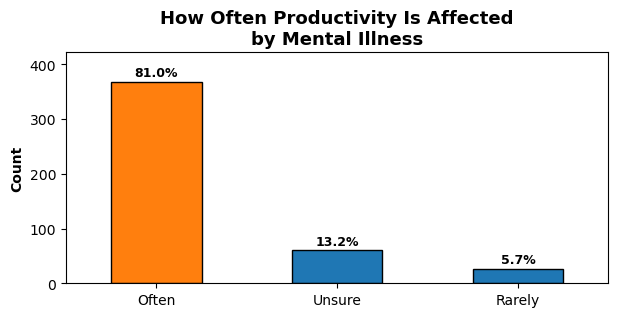

In [45]:
f_tbl = my.calc_counts_and_percentages("affected_productivity", ds)
my.plot_counts_with_labels(
    f_tbl,
    x_lab="",
    rot=0,
    title="How Often Productivity Is Affected\nby Mental Illness",
    color=[orange, blue, blue],
)
f_tbl

In [46]:
print_questions((48, 49))

Questions:


,ID,Question
0,48,"If you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?"
1,49,"If you have a mental health disorder, how often do you feel that it interferes with your work when not being treated effectively (i.e., when you are experiencing symptoms)?"


After removing non-relevant answers, n=2031 respondents were included.
Cross-tabulation:


productivity_interference,A. Never,B. Rarely,C. Sometimes,D. Often,Total
treatment,,,,,
Treated,165,700,808,166,1839
Untreated,24,113,672,1183,1992


Percentage of group (treated/untreated) totals:


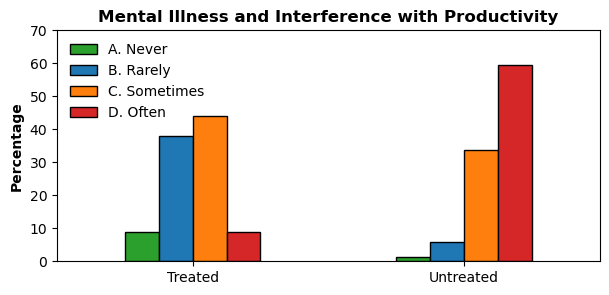

In [47]:
# -- Group 'Not applicable to me' was excluded
q_48_49 = pd.read_sql(
    """--sql
     WITH recoded_48_49 AS (
        SELECT
            UserID user_id,
            SurveyID year,
            CASE 
                WHEN AnswerText = 'Often' THEN "D. Often"
                WHEN AnswerText = 'Sometimes' THEN "C. Sometimes"
                WHEN AnswerText = 'Rarely' THEN "B. Rarely"
                WHEN AnswerText = 'Never' THEN "A. Never"
                WHEN AnswerText = 'Not applicable to me' THEN NULL
                ELSE AnswerText
            END AS productivity_interference,
            QuestionID
        FROM Answer 
        WHERE QuestionID IN (48, 49)
    )

    SELECT user_id, year, 'Treated' AS treatment, productivity_interference
    FROM recoded_48_49 
    WHERE QuestionID = 48

    UNION ALL

    SELECT user_id, year, 'Untreated' AS treatment, productivity_interference
    FROM recoded_48_49 
    WHERE QuestionID = 49;
    """,
    db_engine,
)
# N respondents
#     Non-relevant values were removed, the same people answered to both
#     questions on situation while being treated and without treatment.
n = q_48_49.dropna()["user_id"].nunique()

# Absolute counts
ct_abs = my.crosstab(q_48_49, "treatment", "productivity_interference")

# Plot
plt.rc("figure", figsize=(7, 3))
my.plot_crosstab_as_barplot(
    ct_abs,
    title="Mental Illness and Interference with Productivity",
    ylim=[None, 70],
    color=[green, blue, orange, red],
)
plt.legend(frameon=False, loc="upper left")

# Output
print(
    f"After removing non-relevant answers, n={n} respondents were included.\n"
    "Cross-tabulation:"
)
ct_abs["Total"] = ct_abs.sum(numeric_only=True, axis=1)
display(ct_abs)

print("Percentage of group (treated/untreated) totals:")

***

### Factors Related to MHD Treatment Seeking


First, let's look at respondent's willingness and openness to discuss MHD issues during job interview, with coworkers and with supervisor.

Questions:


,ID,Question
0,12,Would you bring up a mental health issue with a potential employer in an interview?
1,18,Would you feel comfortable discussing a mental health issue with your coworkers?
2,19,Would you feel comfortable discussing a mental health issue with your direct supervisor(s)?


choice,Yes,Maybe,No
discuss_mental_issue,,,
in interview,231,1036,2951
with coworkers,682,1053,719
with supervisor,932,815,707


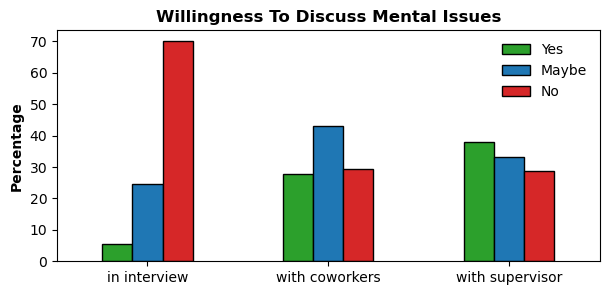

In [48]:
print_questions((12, 18, 19))

ct = my.crosstab(q_openness, "discuss_mental_issue", "choice")
my.plot_crosstab_as_barplot(
    ct, color=[green, blue, red], title="Willingness To Discuss Mental Issues"
)
plt.gca().legend(frameon=False)
ct

Most of people are not willing to talk about mental health during job interview.
And comparing two rest situations, there is a sightly bigger openness to discuss mental health topics with supervisor than with coworkers.

Next, let's explore the factors that might be related to willingness to seek professional MHD help. 

The main findings of the following analysis will be described in section "Summary".

Question:


,ID,Question
0,7,Have you ever sought treatment for a mental health disorder from a mental health professional?


,ever_sought_prof_mhd_treatment,n,percent
0,Yes,2412,57.2%
1,No,1806,42.8%


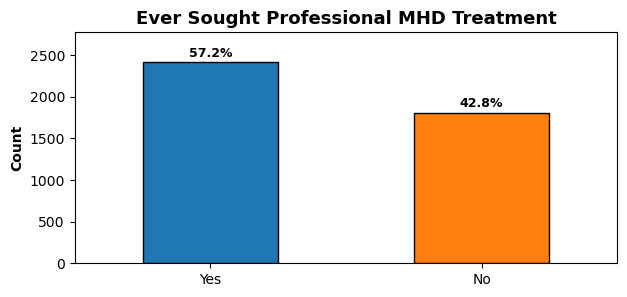

In [49]:
print_questions(7)

f_tab = my.calc_counts_and_percentages("ever_sought_prof_mhd_treatment", ds)
my.plot_counts_with_labels(
    f_tab,
    rot=0,
    color=[blue, orange],
    x_lab="",
    title="Ever Sought Professional MHD Treatment",
)
f_tab

Let's look into data divided to groups. Firstly, let's group by the year of survey.

ever_sought_prof_mhd_treatment,Yes,No
year,,
2014,637,623
2016,839,594
2017,456,300
2018,263,154
2019,217,135


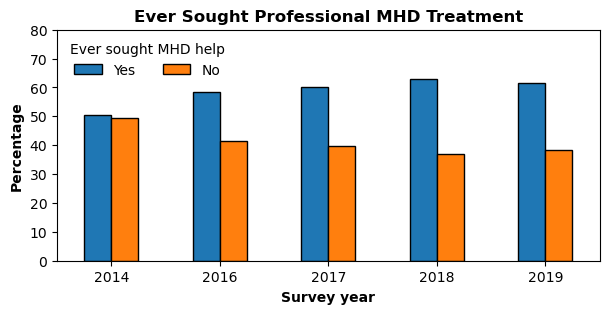

In [50]:
c_tab = my.crosstab(ds, "year", "ever_sought_prof_mhd_treatment")
my.plot_crosstab_as_barplot(
    c_tab,
    xlabel="Survey year",
    title="Ever Sought Professional MHD Treatment",
    ylim=[None, 80],
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Question:


,ID,Question
0,2,What is your gender?


ever_sought_prof_mhd_treatment,Yes,No
gender,,
Female,747,278
Male,1552,1494
Other/Unknown,113,34


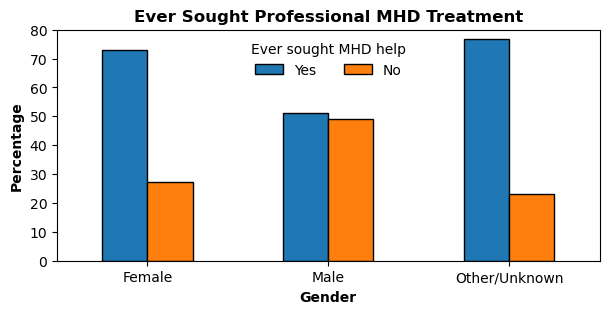

In [51]:
print_questions(2)

c_tab = my.crosstab(ds, "gender", "ever_sought_prof_mhd_treatment")
my.plot_crosstab_as_barplot(
    c_tab,
    ylim=[None, 80],
    xlabel="Gender",
    title="Ever Sought Professional MHD Treatment",
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Question:


,ID,Question
0,1,What is your age?


ever_sought_prof_mhd_treatment,Yes,No
age_group,,
18-25,276,265
26-30,605,485
31-35,616,438
36-40,428,322
41-45,247,165
46-50,117,74
51-55,62,31
56-60,28,15
61-65,17,4


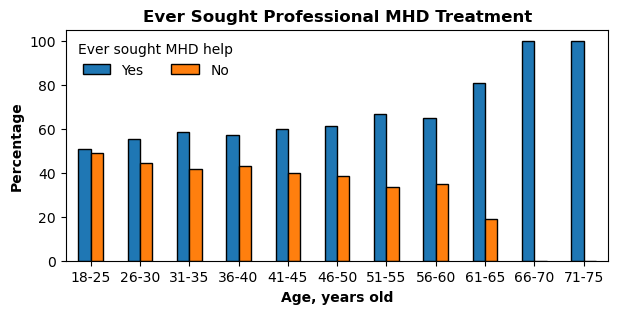

In [52]:
print_questions(1)

c_tab = my.crosstab(ds, "age_group", "ever_sought_prof_mhd_treatment")
my.plot_crosstab_as_barplot(
    c_tab,
    xlabel="Age, years old",
    title="Ever Sought Professional MHD Treatment",
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Two most representative (by number of respondents) regions are included:

ever_sought_prof_mhd_treatment,Yes,No
region,,
Europe,516,595
North America,1757,1047


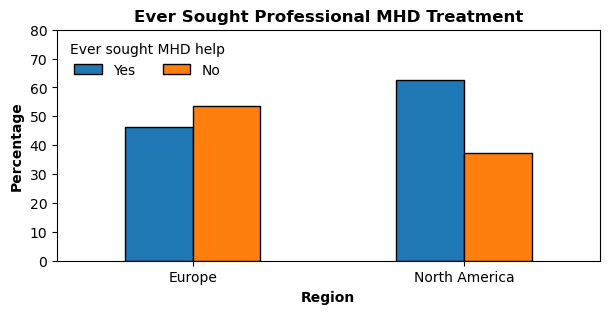

In [53]:
c_tab = my.crosstab(
    ds.query("region in ['Europe', 'North America']"),
    "region",
    "ever_sought_prof_mhd_treatment",
)
my.plot_crosstab_as_barplot(
    c_tab,
    ylim=[None, 80],
    xlabel="Region",
    title="Ever Sought Professional MHD Treatment",
    rot=0,
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Question:


,ID,Question
0,5,Are you self-employed?


ever_sought_prof_mhd_treatment,Yes,No
self_employed,,
Yes,390,260
No,2013,1537


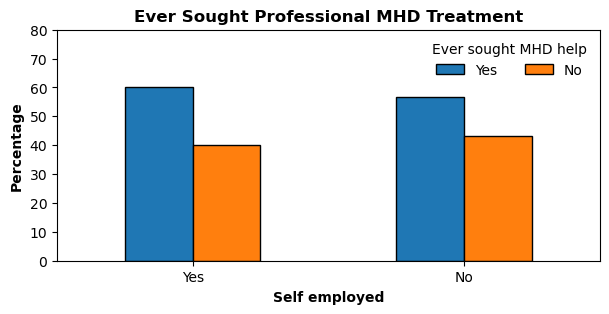

In [54]:
print_questions(5)

c_tab = my.crosstab(ds, "self_employed", "ever_sought_prof_mhd_treatment")
my.plot_crosstab_as_barplot(
    c_tab,
    xlabel="Self employed",
    title="Ever Sought Professional MHD Treatment",
    ylim=[None, 80],
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Question:


,ID,Question
0,8,How many employees does your company or organization have?


ever_sought_prof_mhd_treatment,Yes,No
company_size_3,,
A. 1-100,916,851
B. 100-1000,634,401
C. More than 1000,550,362


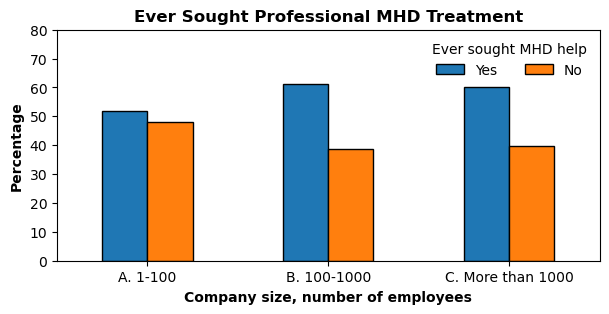

In [55]:
print_questions(8)

c_tab = my.crosstab(ds, "company_size_3", "ever_sought_prof_mhd_treatment")
my.plot_crosstab_as_barplot(
    c_tab,
    xlabel="Company size, number of employees",
    title="Ever Sought Professional MHD Treatment",
    ylim=[None, 80],
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Question:


,ID,Question
0,9,Is your employer primarily a tech company/organization?


ever_sought_prof_mhd_treatment,Yes,No
is_tech_org,,
Yes,1618,1270
No,482,344


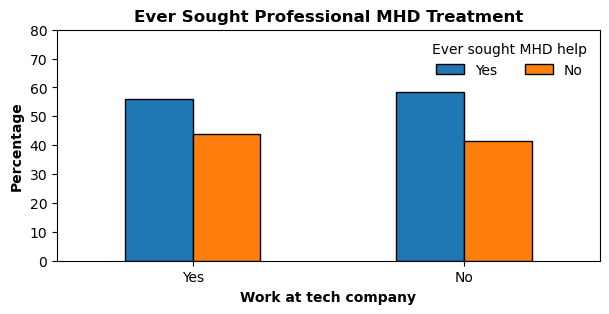

In [56]:
print_questions(9)

c_tab = my.crosstab(ds, "is_tech_org", "ever_sought_prof_mhd_treatment")
my.plot_crosstab_as_barplot(
    c_tab,
    xlabel="Work at tech company",
    title="Ever Sought Professional MHD Treatment",
    ylim=[None, 80],
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Question:


,ID,Question
0,13,Is your primary role within your company related to tech/IT?


ever_sought_prof_mhd_treatment,Yes,No
is_tech_it_role,,
Yes,891,580
No,66,34


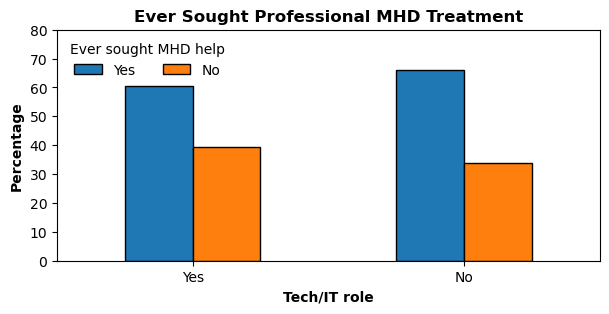

In [57]:
print_questions(13)

c_tab = my.crosstab(ds, "is_tech_it_role", "ever_sought_prof_mhd_treatment")
my.plot_crosstab_as_barplot(
    c_tab,
    xlabel="Tech/IT role",
    title="Ever Sought Professional MHD Treatment",
    ylim=[None, 80],
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Question:


,ID,Question
0,16,Does your employer offer resources to learn more about mental health disorders and options for seeking help?


ever_sought_prof_mhd_treatment,Yes,No
employer_teach,,
Yes,475,227
No,627,457
Don't know,361,307


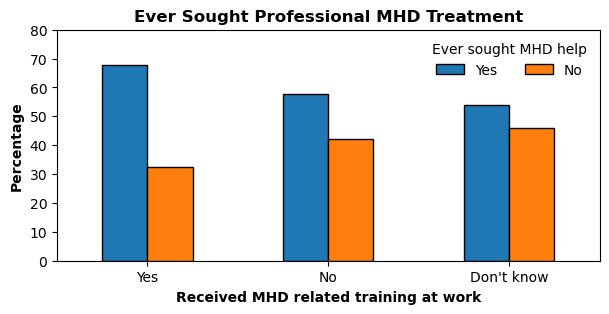

In [58]:
print_questions(16)

c_tab = my.crosstab(ds, "employer_teach", "ever_sought_prof_mhd_treatment")
my.plot_crosstab_as_barplot(
    c_tab,
    xlabel="Received MHD related training at work",
    title="Ever Sought Professional MHD Treatment",
    ylim=[None, 80],
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Question:


,ID,Question
0,10,Does your employer provide mental health benefits as part of healthcare coverage?


ever_sought_prof_mhd_treatment,Yes,No
employer_mental_healthcare,,
Yes,1182,562
No,371,385
Not eligible for coverage,92,56
Don't know,455,611


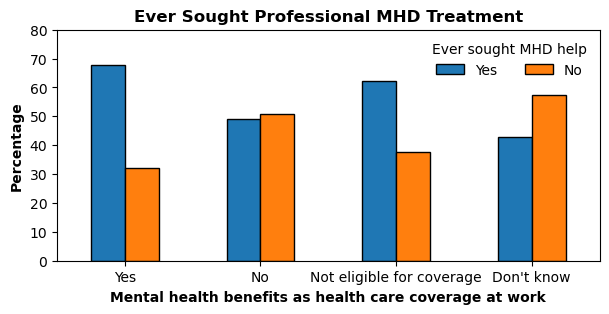

In [59]:
print_questions(10)

c_tab = my.crosstab(
    ds, "employer_mental_healthcare", "ever_sought_prof_mhd_treatment"
)
my.plot_crosstab_as_barplot(
    c_tab,
    ylim=[None, 80],
    xlabel="Mental health benefits as health care coverage at work",
    title="Ever Sought Professional MHD Treatment",
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

Question:


,ID,Question
0,11,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?


ever_sought_prof_mhd_treatment,Yes,No
anonym_protection_to_treat,,
Yes,710,425
No,116,97
Don't know,1274,1092


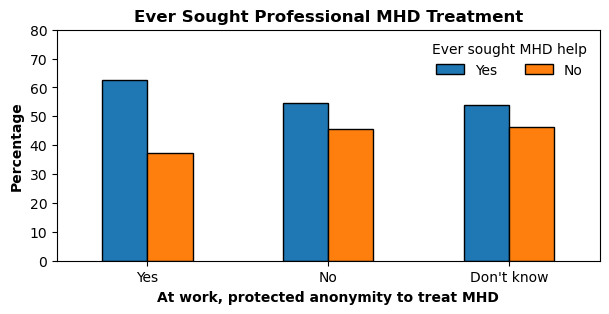

In [60]:
print_questions(11)

c_tab = my.crosstab(
    ds, "anonym_protection_to_treat", "ever_sought_prof_mhd_treatment"
)
my.plot_crosstab_as_barplot(
    c_tab,
    ylim=[None, 80],
    xlabel="At work, protected anonymity to treat MHD",
    title="Ever Sought Professional MHD Treatment",
)
plt.gca().legend(frameon=False, title="Ever sought MHD help", ncol=2)
c_tab

***

## Take Away Points

- In this project, Mental Health in the Tech Industry dataset, which covers **2014-2019 year** surveys, was explored.
- The findings are most applicable to the regions of **North America and Europe** especially USA, as most of respondents were from there.
- The results show that **effective MHD treatment** may **increase productivity** at work.
- In order to get professional treatment, people should look for professional help.
- The factors **positively** related to seeking MHD help: 
  - mental health **benefits** as part of healthcare coverage, 
  - **increased anonymity** to treat MHD, 
  - work in **bigger company**, 
  - **older** respondent's **age**, and 
  - provided **education on MHD**
- The factor that were **irrelevant** (had no relationship):
  - working in **technical/non-technical** role or company.
- **More effort** should be placed on improving situation the following groups as they are less prone to look for MHD related help:
  -  **males**,
  -  **younger** people, and
  -  **Europeans** (compared to North Americans).
- Employees are more prone to reveal MHD issues to managers than to coworkers. So **managers have more influence** on the ways **to increase productivity**.
- It seams that situation is getting better over the years, but there is **much to do to reach an optimal point**.

## 

## Suggestions to Improve the Analysis 

1) A more broad analysis tat includes more questions and more relationships between the answers could be performed, e.g.:
    - Factors such as race were not included but might be important.
    - Not only general MHD, but also subtypes of it should be investigated.
2) In some analyses more emphasis could be put on the cases, where sample size or response rate is small, to indicate that these results are less reliable.